# Cost Function： 6 parameters

In [4]:
import os.path
import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from cost_function import cost, img2bw

In [12]:
def ResizeImage(filein,width,height):
    fileout=filein.resize((width,height),Image.Resampling.LANCZOS)
    return fileout


def img2bw(img): 
    img_gray=img.convert('L') # rgb 2 gray
    array_img=np.array(img_gray) # img 2 array
    _,img_BW=cv2.threshold(array_img,0,255,cv2.THRESH_OTSU) # gray 2 bw
    return img_BW

    

In [8]:
img_gen=Image.open('./result.png')
w_gen,h_gen=img_gen.size
img_ori=Image.open('./images_experiment/220304_miliq_T17.7_S73.04.png')
w_ori,h_ori=img_ori.size


323


In [72]:
#input
x=20
y=0
img_gen=Image.open('./result.png')
#img_ori=Image.open('./images_experiment/220304_miliq_T17.7_S73.04.png')

path_ori=os.path.abspath('./images_experiment/220304_miliq_T17.7_S73.04.png')
img_ori=Image.open(path_ori)

K=1 # reletive scaling constant

#used for reshape the images
w_gen,h_gen=img_gen.size
w_ori,h_ori=img_ori.size

scaling_ori=100/w_ori # reshape the origin image to weight 100
w_ori2=int(scaling_ori*w_ori)
h_ori2=int(scaling_ori*h_ori)

scaling_gen=K*scaling_ori
w_gen2=int(scaling_gen*w_gen)
h_gen2=int(scaling_gen*h_gen)


A=img2bw(ResizeImage(img_ori,w_ori2,h_ori2))
B=img2bw(ResizeImage(img_gen,w_gen2,h_gen2))
C=np.zeros((w_ori2,h_ori2))

#print(B.shape)
#Image.fromarray(np.uint8(B))

for i in range (h_ori2): # h
    for j in range(w_ori2): # w
        if i < y or i-y>= h_gen2 or j < x or j-x >= w_gen2:
            C[i,j]=A[i,j]
        else:
            if  A[i,j]==B[i-y,j-x]:
                C[i,j]=255
            else:
                C[i,j]=0
        

# pixel that same(T) different(F) and drop area
t=0; f=0; 
#drop_ori=0; drop_gen=0 
for i in range (w_ori2):
    for j in range(h_ori2):
        if C[i,j]==0:
            f=f+1
        else:
            t=t+1


lost=f/max(w_ori2*h_ori2,w_gen2*h_gen2)

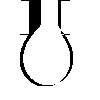

In [65]:
Image.fromarray(np.uint8(C))

# Remove the Needle

In [1]:
from PIL import Image
import numpy as np
from cost_function import img2bw, ResizeImage
import matplotlib.pyplot as plt

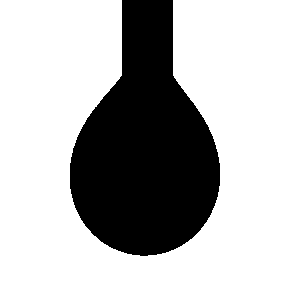

In [2]:
path_ori=os.path.abspath('./images_experiment/220304_miliq_T17.7_S73.04.png')
img_ori=Image.open(path_ori)

# Resize and convert img to nparray
w_ori,h_ori=img_ori.size
width=300
scaling_ori=width/w_ori # reshape the origin image to weight 100
w_ori2=int(scaling_ori*w_ori)
h_ori2=int(scaling_ori*h_ori)
A=img2bw(ResizeImage(img_ori,w_ori2,h_ori2))

Image.fromarray(np.uint8(A))

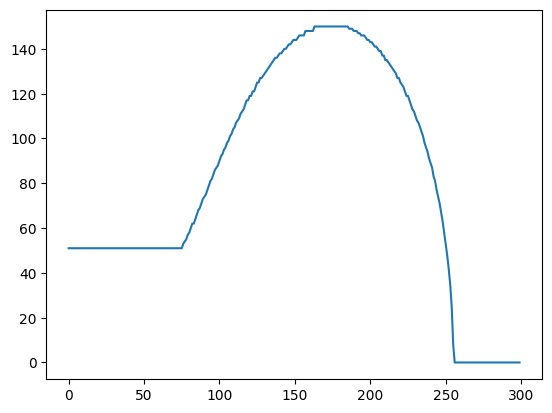

In [3]:
left_edge=np.zeros(w_ori2)
right_edge=np.zeros(w_ori2)
for i in range(h_ori2):
    for j in range(w_ori2):
        if A[i,j-1]>=125 and A[i,j]<125:
            #print('Left position',i,j)
            left_edge[i]=j
        if A[i,j-1]<=125 and A[i,j]>125:
            #print('Right position',i,j)
            right_edge[i]=j

needle=np.abs(left_edge-right_edge)


plt.plot(needle)

In [13]:
end=0

for i in range(needle.shape[0]):
    if end == 0:
        i=i+1
    if abs((needle[i]-needle[0])/needle[0])>0.05:
        stopline=iend=end+1


2

In [ ]:
img_WON=np.zeros((h_ori2-stopline,w_ori2))
for i in range(h_ori2):
    if i>=stopline:
        img_WON[i-stopline,:]=A[i,:]